## Classification Problem

Consider a simple classification problem of whether or not a candidate's profile is accepted for a job interview.

**Problem Statement**

> HR of company ABC decides whether or not to give a chance for the job interview. For simplicity, only two parameters are considered - **GPA** and **year of experience**. A dataset of GPA, year of experience and decision (True or False) is provided in `candidates.csv`.

### Preview dataset

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

candidates = pd.read_csv('./candidates.csv')

In [24]:
candidates.head()

,gpa,experience,offer
0,5.5,2.5,0
1,5.4,3.0,0
2,3.1,3.0,0
3,5.8,5.5,0
4,5.2,4.5,0


**Draw a scatter plot**

* **X-axis** - GPA
* **Y-axis** - Years of experience
* **Colors**
    * **Red**   - Reject
    * **Green** - Accept

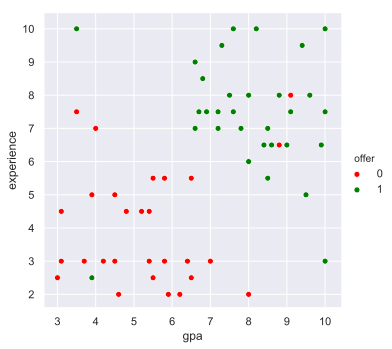

In [25]:
sns.pairplot(
    x_vars = ["gpa"],
    y_vars = ["experience"],
    data = candidates,
    hue = "offer",
    height = 5,
    palette = {0:"red", 1:"green"}
)

A line can be easily drawn to separate **Red** and **Green** dots. Let's draw a line with points determined from naked eye. Also, label **GPA** as `x1` and **Experience** as `x2`.

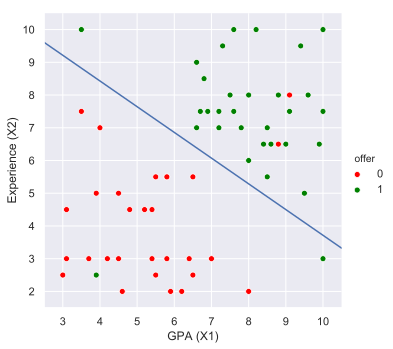

In [48]:
# Scatter plot (same as before)
g = sns.pairplot(
    x_vars = ["gpa"],
    y_vars = ["experience"],
    data = candidates,
    hue = "offer",
    height = 5,
    palette = {0:"red", 1:"green"}
)

# Add Labels, axes
g.set(
    xlim = (2.5, 10.5),
    ylim = (1.5, 10.5),
    xlabel="GPA (X1)",
    ylabel="Experience (X2)"
)

# Plot line
plt.plot([2, 16], [10, -1])

Equation of the line passing through points `(2, 16)`, `(10, -1)` can be calculated as,

$$
\frac{y - y_1}{x - x_1} = \frac{y_2 - y_1}{x_2 - x_1}
$$

$$
\frac{y - 16}{x - 2} = \frac{-17}{8}
$$

$$
17x + 8y - 162 = 0
$$

In terms of $x_1$ and $x_2$,

$$
17x_1 + 8x_2 - 162 = 0
$$

We can use this equation to determine whether a new candidate would be offered an interview or not. Consider the left part of the equation as `Score`

**Score**

`Score = (17 * GPA) + (8 * Experience) - 162`

**Prediction**

* `Score > 0` - **<span style="color:green">Accept</span>**
* `Score < 0` - **<span style="color:red">Reject</span>**

### Modelling

**Boundary Line**

$$
w_1 x_1 + w_2 x_2 + b = 0
$$

In terms of vectors,

$$
Wx + b = 0
$$

where,

$$
W = (w_1, w_2),
x = (x_1, x_2),
y = "0" or "1"
$$

**Prediction**

$$
\hat{y} =
\left\{
\begin{array}{ll}
1 & \mbox{if $Wx + b \geq 0$},\\
0 & \mbox{if $Wx + b \lt 0$},\\
\end{array}
\right.
$$